# Toration of no hermitian mass matrices

Hermitian term:
    
$\mathcal{L}_{\text{mas}} = \psi^{\dagger} M \psi$
$\to$
$M_{\text{diag}}=U^{-1}MU$

No hermitian term:
 
$\mathcal{L}_{\text{mas}} = \psi_R^{\dagger} M \psi_L = \psi_1^{\dagger} M \psi_2$
$\to$ $\color{red}{M_{\text{diag}}^2=V^{-1}MM^TV = U^{-1}M^TMU}$


ie. the $V$ and $U$ matricess diagonalize the matrices $MM^T$ and $M^TM$ respectively

such that: $\Psi_1^i=V_{ij}\psi_1^j$ and $\Psi_2^i=U_{ij}\psi_2^j$

In [1]:
import numpy as np
import pandas as pd
#import commands
import subprocess
import time

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt 

DM values

In [3]:
#Experimental values for DM: Planck results 2015
e = 3
Omega = 0.1197
Omega_max=Omega + e*0.0022
Omega_min=Omega - e*0.0022
print(Omega, Omega_min,Omega_max)
# out: (0.1197, 0.1131, 0.1263)

0.1197 0.1131 0.1263


# General scrip

In [4]:
#!/usr/bin/env python

#Import run_dicctionary.py
#This file run a lot of dicctionaryes to run SPheno

import pyslha
import pySDdiracDM_LesHouches_generator
import numpy as np
import pandas as pd
#import commands
import subprocess
import time
import sys

# Tiempo inicial
t1=time.time() 

#Open xdict which is now a <PySLHA Doc: 10 blocks, 0 decays, 0 xsections>
xdict = pySDdiracDM_LesHouches_generator.buildSLHAinFile()

x=[]

#times to run the program. Entry using the keyboard
#Num = int(sys.argv[1])
Num = 1

for n in range(0,Num):

    #Random parameters as input  
    #BLOCK MINPAR
    MDF = 300.
    MS12 = np.exp(np.random.uniform(np.log(1.*10**(5)),np.log(9.*10**(6))))
    MS22 = 9.0E+06
    LamS1H = 0.0E-04
    LamS2H = 0.0E-04
    LamSPH = 0.0E-04
    LamS = 1.0E-04
    LamSP = 3.0E-01    
    vS = 500.
    YRD = 1.0E-03
    YRC = 5.0E-02
    
    # Modific the LesHouches   
    xdict.blocks['MINPAR'].entries[2]='%.7E    # MDFInput' %MDF
    xdict.blocks['MINPAR'].entries[3]='%.7E    # MS12Input' %MS12
    xdict.blocks['MINPAR'].entries[4]='%.7E    # MS22Input' %MS22
    xdict.blocks['MINPAR'].entries[5]='%.7E    # LamS1HInput' %LamS1H
    xdict.blocks['MINPAR'].entries[6]='%.7E    # LamS2HInput' %LamS2H
    xdict.blocks['MINPAR'].entries[7]='%.7E    # LamSPHInput' %LamSPH
    xdict.blocks['MINPAR'].entries[8]='%.7E    # LamSInput' %LamS
    xdict.blocks['MINPAR'].entries[9]='%.7E    # LamSPInput' %LamSP
    xdict.blocks['MINPAR'].entries[10]='%.7E    # vSInput' %vS
    xdict.blocks['MINPAR'].entries[11]='%.7E    # YRDInput' %YRD
    xdict.blocks['MINPAR'].entries[12]='%.7E    # YRCInput' %YRC
    
    YRA11 = 1.500000E-02
    YRA12 = 2.000000E-02    
    YRA13 = 1.000000E-02
    
    xdict.blocks['YRA1IN'].entries[1]='%.6E    # YRA1(1)' %YRA11  
    xdict.blocks['YRA1IN'].entries[2]='%.6E    # YRA1(2)' %YRA12     
    xdict.blocks['YRA1IN'].entries[3]='%.6E    # YRA1(3)' %YRA13 
    
    YRA21 = 3.500000E-03
    YRA22 = 2.000000E-03    
    YRA23 = 1.000000E-03
    
    xdict.blocks['YRA2IN'].entries[1]='%.6E    # YRA2(1)' %YRA21  
    xdict.blocks['YRA2IN'].entries[2]='%.6E    # YRA2(2)' %YRA22     
    xdict.blocks['YRA2IN'].entries[3]='%.6E    # YRA2(3)' %YRA23     

    YRB11 = 1.100000E-04
    YRB12 = 3.000000E-03    
    YRB13 = 1.100000E-03
    
    xdict.blocks['YRB1IN'].entries[1]='%.6E    # YRB1(1)' %YRB11  
    xdict.blocks['YRB1IN'].entries[2]='%.6E    # YRB1(2)' %YRB12     
    xdict.blocks['YRB1IN'].entries[3]='%.6E    # YRB1(3)' %YRB13 
    
    YRB21 = 1.500000E-04
    YRB22 = 3.000000E-03    
    YRB23 = 1.100000E-03
    
    xdict.blocks['YRB2IN'].entries[1]='%.6E    # YRB2(1)' %YRB21  
    xdict.blocks['YRB2IN'].entries[2]='%.6E    # YRB2(2)' %YRB22     
    xdict.blocks['YRB2IN'].entries[3]='%.6E    # YRB2(3)' %YRB23      
    
    #Write the Leshouches file
    pyslha.writeSLHAFile('LesHouches.in.SDdiracDM_low',xdict)
    
    #run SPheno
    spheno = subprocess.getoutput('../.././SPheno-4.0.3/bin/SPhenoSDdiracDM LesHouches.in.SDdiracDM_low')
    SPheno_output = subprocess.getoutput('cat SPheno.spc.SDdiracDM')
    
    mh1 = eval(SPheno_output.split('Block MASS')[1].split()[9])
    mh2 = eval(SPheno_output.split('Block MASS')[1].split()[13])  
    
    ##++++++++++ Neutrinos +++++++++++++++++++++++++++++++++
    if SPheno_output.split('# Fe_3')[1].split()[1] == "NaN":
        mv1 = 0.
    else: 
        mv1 = eval(SPheno_output.split('# Fe_3')[1].split()[1])  
        
    mv2 = eval(SPheno_output.split('# Fe_3')[1].split()[5])       
    mv3 = eval(SPheno_output.split('# Fe_3')[1].split()[9])    
    
    mS1 = eval(SPheno_output.split('# Fe_3')[1].split()[13])
    mS2 = eval(SPheno_output.split('# Fe_3')[1].split()[17])

    mCha = eval(SPheno_output.split('# Fe_3')[1].split()[21])
    mChi1 = eval(SPheno_output.split('# Fe_3')[1].split()[25])
    mChi2 = eval(SPheno_output.split('# Fe_3')[1].split()[29])
    
    XV11 = eval(SPheno_output.split('Block XV')[1].split()[6])
    XV12 = eval(SPheno_output.split('Block XV')[1].split()[11])
    XV21 = eval(SPheno_output.split('Block XV')[1].split()[16])
    XV22 = eval(SPheno_output.split('Block XV')[1].split()[21])
    
    XU11 = eval(SPheno_output.split('Block XU')[1].split()[6])
    XU12 = eval(SPheno_output.split('Block XU')[1].split()[11])
    XU21 = eval(SPheno_output.split('Block XU')[1].split()[16])
    XU22 = eval(SPheno_output.split('Block XU')[1].split()[21])

    x.append([MDF,MS12,MS22,LamS1H,LamS2H,LamSPH,LamS,LamSP,vS,YRD,YRC,YRA11,YRA12,YRA13,YRA21,YRA22,YRA23,\
              YRB11,YRB12,YRB13,YRB21,YRB22,YRB23,mh1,mh2,mv3,mv2,mv1,mS1,mS2,mCha,mChi1,mChi2,\
              XV11,XV12,XV21,XV22,XU11,XU12,XU21,XU22])
    
x=np.asarray(x)
xd=pd.DataFrame(x,columns=['MDF','MS12','MS22','LamS1H','LamS2H','LamSPH','LamS','LamSP','vS','YRD'\
                           ,'YRC','YRA11','YRA12','YRA13','YRA21','YRA22','YRA23','YRB11','YRB12','YRB13','YRB21'\
                           ,'YRB22','YRB23','mh1','mh2','mv3','mv2','mv1','mS1','mS2','mCha','mChi1','mChi2'\
                          ,'XV11','XV12','XV21','XV22','XU11','XU12','XU21','XU22'])

t4=time.time() 
print ("The program spent", t4-t1, "s running",Num,"times")    

The program spent 0.9380064010620117 s running 1 times


In [5]:
xd[['mv1','mv2','mv3','mS1','mS2']]

,mv1,mv2,mv3,mS1,mS2
0,0.0,1.953946e-13,2.181422e-09,688.870235,3000.0


In [6]:
SPheno_output.splitlines()

['# SUSY Les Houches Accord 2 - SDdiracDM Spectrum + Decays + Flavor Observables',
 '# SPheno module generated by SARAH',
 '# ----------------------------------------------------------------------',
 '# SPheno v4.0.3  ',
 '#   W. Porod, Comput. Phys. Commun. 153 (2003) 275-315, hep-ph/0301101',
 '#   W. Porod, F.Staub, Comput.Phys.Commun.183 (2012) 2458-2469, arXiv:1104.1573',
 '# SARAH: 4.12.3  ',
 '#   F. Staub; arXiv:0806.0538 (online manual)',
 '#   F. Staub; Comput. Phys. Commun. 181 (2010) 1077-1086; arXiv:0909.2863',
 '#   F. Staub; Comput. Phys. Commun. 182 (2011)  808-833; arXiv:1002.0840',
 '#   F. Staub; Comput. Phys. Commun. 184 (2013)  1792-1809; arXiv:1207.0906',
 '#   F. Staub; Comput. Phys. Commun. 185 (2014)  1773-1790; arXiv:1309.7223 ',
 '# Including the calculation of flavor observables based on the FlavorKit ',
 '#   W. Porod, F. Staub, A. Vicente; Eur.Phys.J. C74 (2014) 8, 2992; arXiv:1405.1434 ',
 '# Two-loop masss corrections to Higgs fields based on ',
 '#   M.

# Analytical rutine for Neutrino mass matriz

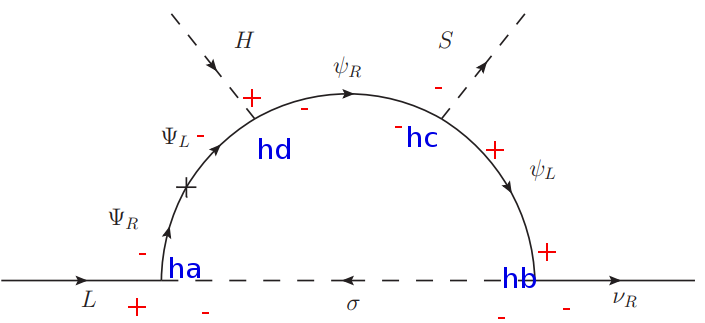

In [8]:
from IPython.display import Image
Image("/home/anferivera/Dropbox/SingletDoubletDirac/draft_SDdiracDM/figures/neutrino-GB.png", width=400)

THREE DIRAC FERMIONS IN THE LOOP:

\begin{align}
\mathcal{M}_{\alpha\beta}= \sum_{i=1}^2\sum_{k=1}^3
\dfrac{V_{k1}U_{k3}}{16\pi^2}
\times b_{\alpha i} a_{\beta i} m_{N_k} 
\times \left[\dfrac{m_{N_k}^2}{\left(m_{N_k}^2-m_{S_i}^2\right)}\ln{\left(\dfrac{m_{N_k}^2}{m_{S_i}^2}\right)}\right]\,.
\end{align}

TWO DIRAC FERMIONS IN THE LOOP:

\begin{align}
\mathcal{M}_{\alpha\beta}= \sum_{i=1}^2\sum_{k=1}^2
\dfrac{V_{k2}U_{k1}}{16\pi^2}
\times b_{\alpha i} a_{\beta i} m_{N_k} 
\times \left[\dfrac{m_{N_k}^2}{\left(m_{N_k}^2-m_{S_i}^2\right)}\ln{\left(\dfrac{m_{N_k}^2}{m_{S_i}^2}\right)}\right]\,.
\end{align}

In [10]:
#Loop factor
def Fk(mNk,mSk,Vk2,Uk1):
    
    mk = 1./(16.*np.pi**2)*Vk2*Uk1*(mNk**3/(mNk**2-mSk**2))*np.log(mNk**2/mSk**2)
    
    return mk   

#Mab matrix. sum over i and k is expanded
def Mab(YB1b,YB2b,YA1a,YA2a):
    sumS1= (Fk(mChi1, mS1, XV12, XU11)+Fk(mChi2,mS1,XV22,XU21))*(YB1b*YA1a) 
    
    sumS2= (Fk(mChi1,mS2,XV12,XU11)+Fk(mChi2,mS2,XV22,XU21))*(YB2b*YA2a) 
    
    return sumS1 + sumS2

Mvij = np.matrix( [[Mab(YRB11,YRB21,YRA11,YRA21), Mab(YRB11,YRB21,YRA12,YRA22), Mab(YRB11,YRB21,YRA13,YRA23)],
           [Mab(YRB12,YRB22,YRA11,YRA21), Mab(YRB12,YRB22,YRA12,YRA22), Mab(YRB12,YRB22,YRA13,YRA23)],
           [Mab(YRB13,YRB23,YRA11,YRA21), Mab(YRB13,YRB23,YRA12,YRA22), Mab(YRB13,YRB23,YRA13,YRA23)]] )

#eigenvalues e eigenvectors
(Mdiag2,V)=np.linalg.eig(Mvij*np.transpose(Mvij))

In [11]:
print(Mdiag2)
print(V)

[ 3.81790347e-26  4.75860008e-18 -6.63010337e-35]
[[ 9.99400742e-01 -3.46144078e-02  1.63840210e-10]
 [-3.24986477e-02 -9.38313687e-01 -3.44254649e-01]
 [-1.19161708e-02 -3.44048352e-01  9.38876316e-01]]


In [12]:
MX1 = np.sqrt(np.abs(Mdiag2[0]))
MX2 = np.sqrt(np.abs(Mdiag2[1]))
MX3 = np.sqrt(np.abs(Mdiag2[2]))

In [13]:
## reorganize the eigenvalues (neutrino masses)
mn1 = 0.
mn2 = 0.
mn3 = 0.

if MX1 < MX2 and MX1 < MX3:
    mn1 = MX1
    #print "Hola1"
    
    if MX2 < MX3:
        mn2 = MX2
        mn3 = MX3
    else:
        mn2 = MX3
        mn3 = MX2  
        
if MX2 < MX1 and MX2 < MX3:
    mn1 = MX2
    #print "Hola2" 

    if MX1 < MX3:
        mn2 = MX1
        mn3 = MX3
    else:
        mn2 = MX3
        mn3 = MX1   
        
if MX3 < MX1 and MX3 < MX2:
    mn1 = MX3
    #print "Hola3"  
    
    if MX1 < MX2:
        mn2 = MX1
        mn3 = MX2
    else:
        mn2 = MX2
        mn3 = MX1

print("Theoretical values found:")        
print(mn1, mn2,mn3)    

Theoretical values found:
8.142544671714913e-18 1.9539456162487201e-13 2.1814215728553326e-09


In [14]:
#SPHENO NEUTRINOS MASSES OUTPUT
print(mv1, mv2, mv3)

0.0 1.95394561e-13 2.18142158e-09
